In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from helpr.physics.api import CrackEvolutionAnalysis
from helpr.physics.environment import EnvironmentSpecification
from helpr.physics.crack_growth import get_design_curve
from helpr.utilities.unit_conversion import convert_ksi_to_mpa, convert_in_to_m

from probabilistic.capabilities.uncertainty_definitions import DeterministicCharacterization

In [2]:
# # turn warnings back on for general use
# import warnings
# warnings.filterwarnings('ignore')

## **Demonstration of Crack Growth Curves**

In [3]:
pipe_outer_diameter = DeterministicCharacterization(name='outer_diameter',
                                                    value=convert_in_to_m(36)) # 36 inch outer diameter
wall_thickness = DeterministicCharacterization(name='wall_thickness',
                                               value=convert_in_to_m(0.406)) # 0.406 inch wall thickness
yield_strength = DeterministicCharacterization(name='yield_strength',
                                               value=convert_ksi_to_mpa(52))  # material yield strength of 52 ksi
fracture_resistance = DeterministicCharacterization(name='fracture_resistance', value=55)
max_pressure = DeterministicCharacterization(name='max_pressure',
                                             value=convert_ksi_to_mpa(0.84)) # maximum pressure during oscillation MPa
min_pressure = DeterministicCharacterization(name='min_pressure',
                                             value=convert_ksi_to_mpa(0.638)) # minimum pressure during oscillation (or R = 0.75)
temperature = DeterministicCharacterization(name='temperature',
                                            value=293) # K -> temperature of gas degrees C
volume_fraction_h2 = DeterministicCharacterization(name='volume_fraction_h2',
                                                   value=0.1) # % mole fraction H2 in natural gas blend
flaw_depth = DeterministicCharacterization(name='flaw_depth',
                                           value=25) # flaw 5% through pipe thickness
flaw_length = DeterministicCharacterization(name='flaw_length',
                                            value=0.04)  # length of initial crack/flaw, m

In [4]:
analysis = CrackEvolutionAnalysis(outer_diameter=pipe_outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_length=flaw_length,
                                  flaw_depth=flaw_depth)
analysis.perform_study()

#### Crack Growth Curves for Different Hydrogen Volume Fractions

              Cycles to a(crit)  Cycles to 25% a(crit)  Cycles to 1/2 Nc
Total cycles       17928.262052               1.000000       8964.131026
a/t                    0.333509               0.083377          0.270803


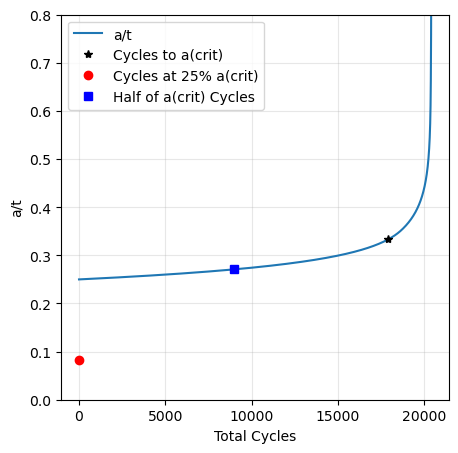

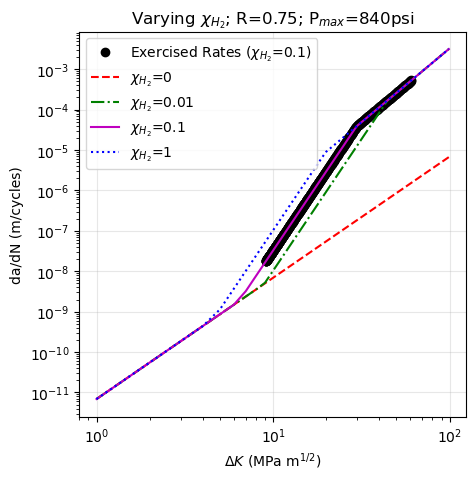

In [5]:
environment_0 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=0)
environment_1 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=0.01)
environment_2 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=0.1)
environment_3 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=1)

analysis.postprocess_single_crack_results()

dk, da_dn = get_design_curve(specified_r=environment_0.calc_r_ratio(),
                             specified_fugacity=environment_0.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'r--', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_1.calc_r_ratio(),
                             specified_fugacity=environment_1.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'g-.', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_2.calc_r_ratio(),
                             specified_fugacity=environment_2.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'm-', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_3.calc_r_ratio(),
                             specified_fugacity=environment_3.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'b:', zorder=2)
plt.title(r'Varying $\chi_{H_2}$; R=0.75; P$_{max}$=840psi')

plt.legend([r'Exercised Rates ($\chi_{H_2}$=0.1)', '$\chi_{H_2}$=0', '$\chi_{H_2}$=0.01', '$\chi_{H_2}$=0.1', '$\chi_{H_2}$=1'], loc='upper left');

#### Crack Growth Curves for Different Load Ratios (R)

              Cycles to a(crit)  Cycles to 25% a(crit)  Cycles to 1/2 Nc
Total cycles       17928.262052               1.000000       8964.131026
a/t                    0.333509               0.083377          0.270803


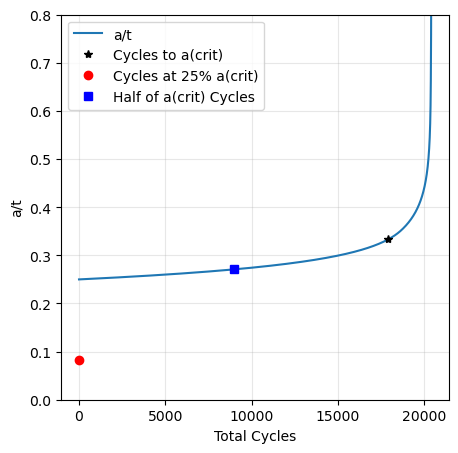

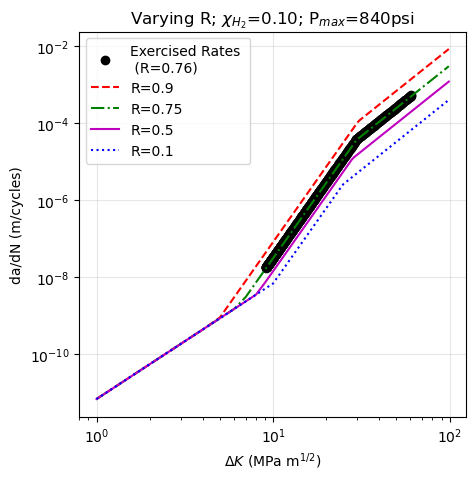

In [6]:
environment = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                       min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                       temperature=analysis.nominal_input_parameter_values['temperature'],
                                       volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])

environment_0 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                       min_pressure=max_pressure.value*.9,
                                       temperature=analysis.nominal_input_parameter_values['temperature'],
                                       volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])
environment_1 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=max_pressure.value*.75,
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])
environment_2 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=max_pressure.value*.5,
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])
environment_3 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                       min_pressure=max_pressure.value*.1,
                                       temperature=analysis.nominal_input_parameter_values['temperature'],
                                       volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])

analysis.postprocess_single_crack_results()

dk, da_dn = get_design_curve(specified_r=environment_0.calc_r_ratio(),
                             specified_fugacity=environment_0.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'r--', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_1.calc_r_ratio(),
                             specified_fugacity=environment_1.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'g-.', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_2.calc_r_ratio(),
                             specified_fugacity=environment_2.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'm-', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_3.calc_r_ratio(),
                             specified_fugacity=environment_3.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'b:', zorder=2)

plt.legend([f'Exercised Rates \n (R={min_pressure.value/max_pressure.value:.2f})', 'R=0.9', 'R=0.75', 'R=0.5', 'R=0.1'], loc='upper left')
mole_frac_string = f"={analysis.nominal_input_parameter_values['volume_fraction_h2']:.2f}; "
plt.title(r'Varying R; $\chi_{H_2}$' + mole_frac_string + r'P$_{max}$=840psi');

#### Crack Growth Curves for Different Max Pressures

              Cycles to a(crit)  Cycles to 25% a(crit)  Cycles to 1/2 Nc
Total cycles       17928.262052               1.000000       8964.131026
a/t                    0.333509               0.083377          0.270803


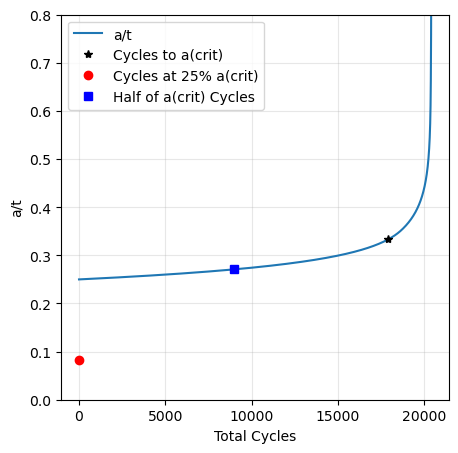

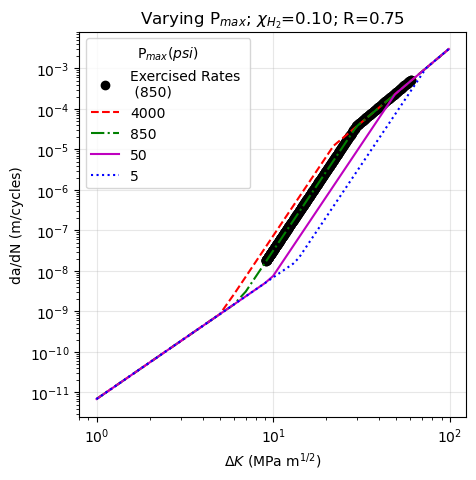

In [7]:
environment_0 = EnvironmentSpecification(max_pressure=convert_ksi_to_mpa(4),
                                         min_pressure=convert_ksi_to_mpa(4)*.75,
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])
environment_1 = EnvironmentSpecification(max_pressure=convert_ksi_to_mpa(0.85),
                                         min_pressure=convert_ksi_to_mpa(0.85)*.75,
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])
environment_2 = EnvironmentSpecification(max_pressure=convert_ksi_to_mpa(0.05),
                                         min_pressure=convert_ksi_to_mpa(0.05)*.75,
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])
environment_3 = EnvironmentSpecification(max_pressure=convert_ksi_to_mpa(0.005),
                                         min_pressure=convert_ksi_to_mpa(0.005)*.75,
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=analysis.nominal_input_parameter_values['volume_fraction_h2'])

analysis.postprocess_single_crack_results()

dk, da_dn = get_design_curve(specified_r=environment_0.calc_r_ratio(), 
                             specified_fugacity=environment_0.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'r--', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_1.calc_r_ratio(),
                             specified_fugacity=environment_1.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'g-.', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_2.calc_r_ratio(),
                             specified_fugacity=environment_2.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'm-', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_3.calc_r_ratio(),
                             specified_fugacity=environment_3.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'b:', zorder=2)

mole_frac_string = f"={analysis.nominal_input_parameter_values['volume_fraction_h2']:.2f}; "
plt.legend([f'Exercised Rates \n (850)', '4000', '850', '50', '5'], title=r'P$_{max} (psi)$', loc='upper left')
plt.title(r'Varying P$_{max}$; $\chi_{H_2}$' + mole_frac_string + f'R=0.75');

#### Crack Growth Curve For Air

In [8]:
volume_fraction_h2 = DeterministicCharacterization(name='volume_fraction_h2',
                                                   value=0) # % mole fraction H2 in natural gas blend

analysis = CrackEvolutionAnalysis(outer_diameter=pipe_outer_diameter,
                                  wall_thickness=wall_thickness,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_length=flaw_length,
                                  flaw_depth=flaw_depth)
analysis.perform_study()

              Cycles to a(crit)  Cycles to 25% a(crit)  Cycles to 1/2 Nc
Total cycles       98658.454759               1.000000      49329.227379
a/t                    0.333509               0.083377          0.280576


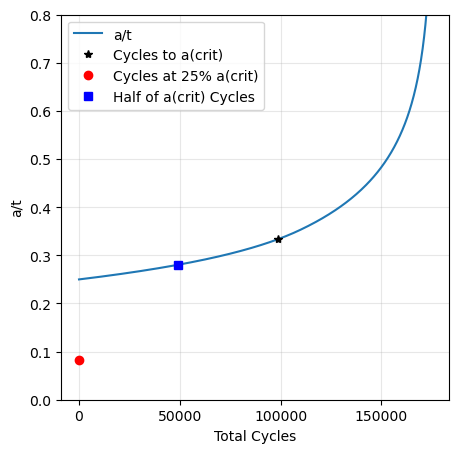

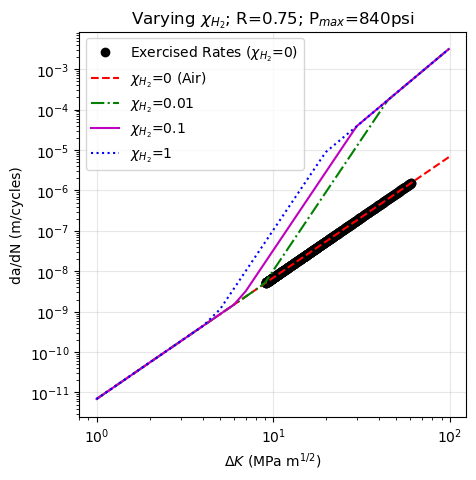

In [9]:
environment_0 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=0)
environment_1 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=0.01)
environment_2 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=0.1)
environment_3 = EnvironmentSpecification(max_pressure=analysis.nominal_input_parameter_values['max_pressure'],
                                         min_pressure=analysis.nominal_input_parameter_values['min_pressure'],
                                         temperature=analysis.nominal_input_parameter_values['temperature'],
                                         volume_fraction_h2=1)

analysis.postprocess_single_crack_results()

dk, da_dn = get_design_curve(specified_r=environment_0.calc_r_ratio(),
                             specified_fugacity=environment_0.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'r--', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_1.calc_r_ratio(),
                             specified_fugacity=environment_1.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'g-.', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_2.calc_r_ratio(),
                             specified_fugacity=environment_2.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'm-', zorder=2)

dk, da_dn = get_design_curve(specified_r=environment_3.calc_r_ratio(),
                             specified_fugacity=environment_3.calc_fugacity_ratio())
plt.plot(dk, da_dn, 'b:', zorder=2)
plt.title(r'Varying $\chi_{H_2}$; R=0.75; P$_{max}$=840psi')

plt.legend([r'Exercised Rates ($\chi_{H_2}$=0)', '$\chi_{H_2}$=0 (Air)', '$\chi_{H_2}$=0.01', '$\chi_{H_2}$=0.1', '$\chi_{H_2}$=1'], loc='upper left');